# Alessio Reitano

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN

#Variables
url1 = 'exam_superv.csv'
url2 = 'exam_unsuperv.csv'
sep = ','
random_state=42

#Directives
%matplotlib inline
np.random.seed(random_state)

### 1. Load the dataset1.csv and explore the data, showing size, structure and histograms of numeric data; show the histogram of the frequencies of the class labels, contained in the “y” column

In [2]:
df1 = pd.read_csv(url1, sep=sep)

In [3]:
print ("The dataframa are {} rows and {} columns".format(df1.shape[0],df1.shape[1]))

The dataframa are 1200 rows and 4 columns


In [4]:
df1.describe()

,0,1,y,2
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,2.391668,1.996186,0.507500,2.494236
std,0.804770,0.507227,0.500152,0.589235
min,0.343023,0.509424,0.000000,1.500260
25%,1.806657,1.809635,0.000000,1.974389
50%,2.744439,1.983524,1.000000,2.469778
75%,3.092275,2.201484,1.000000,2.995198
max,3.529782,3.647299,1.000000,3.498523


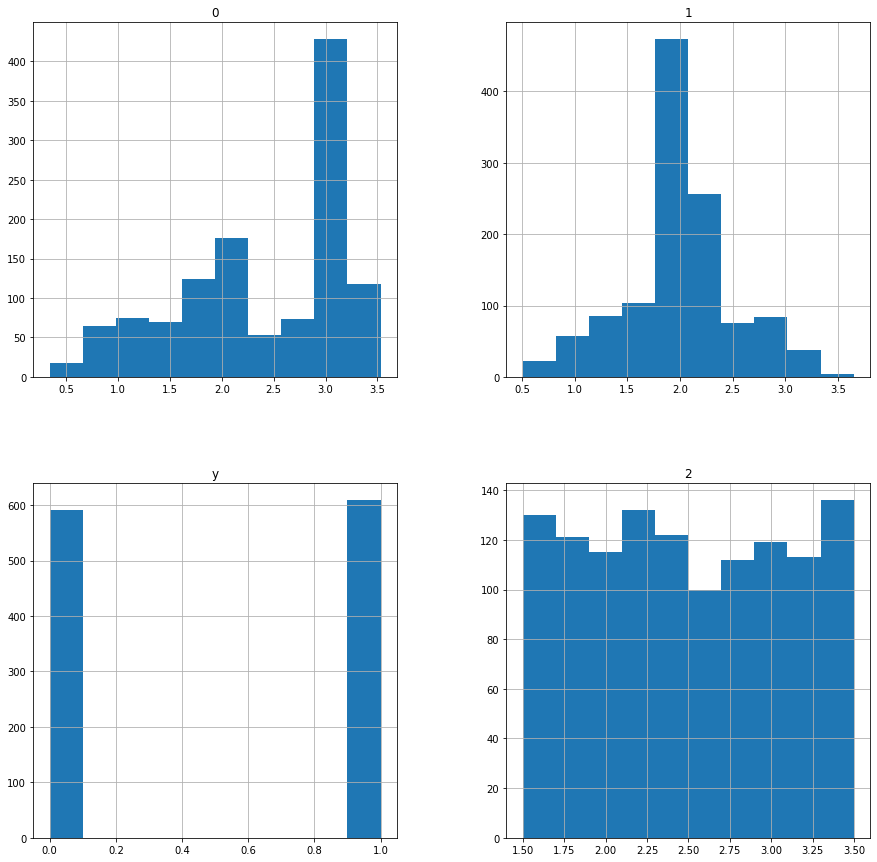

In [5]:
pd.DataFrame.hist(df1, figsize=[15,15]);

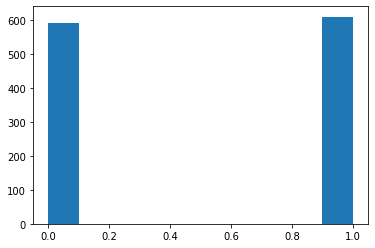

In [6]:
plt.hist(df1.y)
plt.show()

### 2. Drop the column “y” and find the best clustering scheme and hyper–parameters able to reproduce the y column (hint: before clustering you can consider dropping columns with little correlation to “y”; perhaps you should consider more than one estimator for clustering)

In [7]:
df = df1.drop(columns = ['y'])

In [8]:
df1.corr()['y']


0    0.874676
1   -0.000336
y    1.000000
2    0.042789
Name: y, dtype: float64

In [11]:
X = df1.drop(columns = ['1'])
X

,0,y,2
0,1.589942,0,1.953805
1,2.908437,1,1.510049
2,3.284091,1,3.307287
3,3.148717,1,3.452021
4,2.116881,0,2.157870
...,...,...,...
1195,3.044919,1,1.722062
1196,2.911515,1,2.972860
1197,1.702582,0,2.522197
1198,2.695799,0,3.365177


In [10]:
param_grid = {'eps': list(np.arange(0.05, 1, 0.05)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(param_grid))

dbscan_out = pd.DataFrame(columns = ['eps','min_samples','n_clusters', 'size deviation index','silhouette', 'unclust%'])        #0 righe, 5 colonne

for i in params:
    db = DBSCAN(eps = i['eps'], min_samples = i['min_samples'])
    y_db = db.fit_predict(X)
    cluster_labels_all = np.unique(y_db)
    cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    n_clusters = len(cluster_labels)
    if n_clusters >1 :
        #X_cl = X[y_db!=-1,:]                                                #filtra il rumore da X
        #y_db_cl = y_db[y_db!=-1]                                            #filtra il rumore da Y

        #silhouette = silhouette_score(X_cl,y_db_cl)

        silhouette = silhouette_score(X.to_numpy()[y_db != -1],y_db[y_db != -1])
        #deviation = np.sqrt(np.unique(y_db_cl, return_counts = True)[1].var())/i
        #uncl_p = (1 - y_db_cl.shape[0]/y_db.shape[0]) * 100                 #% di dati unclustered
        #dbscan_out.loc[len(dbscan_out)] = [db.eps, db.min_samples, n_clusters, deviation, silhouette, uncl_p]
        print ("Param EPS = "+ str(i['eps'])+ " param MIN_sample ="+str(i['min_samples']))
        print ("The silhouette score is {:.2f}".format(silhouette))
        print("----------------------")

InvalidIndexError: (array([ True,  True,  True, ...,  True,  True,  True]), slice(None, None, None))

### 3.  show the difference between the original “y” column and the labels generated by the clustering, it can be expressed as “accuracy”, produce also the confusion matrix

In [ ]:
db = DBSCAN(eps = 0.15, min_samples = 7)

# Fit and predict
db_y = db.fit_predict(X)
all_label = np.unique(db_y)
print (confusion_matrix(df1.y, db_y))

[[  0   0   0]
 [ 33 558   0]
 [  5   0 604]]


### 4. Apply the same transformations, to dataset2.csv, then apply the best clustering scheme and hyper parameters and plot the data with the assigned labels . 